In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('taxonomy_genus_metadata_merged.csv', index_col=0)

# Define the mapping for the 'Nitrogen' column
nitrogen_mapping = {
    1: 'Low',
    5: 'Optimal',
    6: 'High'
}

# Replace the values in the 'Nitrogen' column based on the mapping
df['Nitrogen'] = df['Nitrogen'].replace(nitrogen_mapping)

# Define the mapping for the 'Water' column
water_mapping = {
    1: 'High',
    2: 'Low'
}

# Replace the values in the 'Water' column based on the mapping
df['Water'] = df['Water'].replace(water_mapping)

df['Total abundance'] = df[['Acaulospora', 'Ambispora', 'Archaeospora', 'Claroideoglomus',
       'Diversispora', 'Entrophospora', 'Geosiphon', 'Glomus', 'Pacispora',
       'Paraglomus', 'Redeckera', 'Scutellospora']].sum(axis = 1)
print(df.shape)
print(df.columns)
df.head()

(168, 34)
Index(['Sample date', 'Sample ID', 'Plot', 'ID', 'Nitrogen', 'Water', 'Block',
       'Direction', 'Barcode', 'Notes', 'Run', 'Year',
       'Grain Yield, 0% MC kg/ha', 'qPCR_DW', 'qPCR_FW', 'qPCR_DW_log',
       'qPCR_FW_log', 'GWC', 'kg NH4-N / ha', 'kg NO3-N / ha', 'DaysElapsed',
       'Acaulospora', 'Ambispora', 'Archaeospora', 'Claroideoglomus',
       'Diversispora', 'Entrophospora', 'Geosiphon', 'Glomus', 'Pacispora',
       'Paraglomus', 'Redeckera', 'Scutellospora', 'Total abundance'],
      dtype='object')


,Sample date,Sample ID,Plot,ID,Nitrogen,Water,Block,Direction,Barcode,Notes,...,Claroideoglomus,Diversispora,Entrophospora,Geosiphon,Glomus,Pacispora,Paraglomus,Redeckera,Scutellospora,Total abundance
barcode53B,2021-06-15,2N,2N,111.0,Low,High,1,N,53.0,NxW_B library,...,0.000000,177.979083,0.0,0.0,292.602137,0.000000,0.00000,0.000000,52.007834,586.829274
barcode65B,2021-06-15,2S,2S,111.0,Low,High,1,S,65.0,NxW_B library,...,15.046371,195.220372,0.0,0.0,778.204724,3918.755032,0.00000,13.179038,70.365392,5149.794247
barcode72B,2021-06-15,23S,23S,211.0,Low,High,2,S,72.0,NxW_B library,...,0.000000,0.000000,0.0,0.0,247.257472,0.000000,81.85102,0.000000,26.747810,399.958476
barcode81B,2021-06-15,23N,23N,211.0,Low,High,2,N,81.0,NxW_B library,...,0.000000,0.000000,0.0,0.0,210.089069,0.000000,0.00000,0.000000,0.000000,244.687365
barcode55B,2021-06-15,32N,32N,311.0,Low,High,3,N,55.0,NxW_B library,...,0.000000,31.961960,0.0,0.0,502.660881,11.081030,69.94732,19.312906,51.783003,811.852916


In [3]:
# Select columns to be normalized
columns_to_normalize = [
    'Acaulospora', 'Ambispora', 'Archaeospora', 'Claroideoglomus',
    'Diversispora', 'Entrophospora', 'Geosiphon', 'Glomus', 'Pacispora',
    'Paraglomus', 'Redeckera', 'Scutellospora'
]

# Calculate the sum for each row
total_counts = df[columns_to_normalize].sum(axis=1)

# Divide each count by the total count and multiply by a constant (e.g., 1e6)
scaling_factor = 100
normalized_counts = df[columns_to_normalize].divide(total_counts, axis=0) * scaling_factor

# Replace the original columns with the normalized values
df[columns_to_normalize] = normalized_counts
df['Total abundance (TSS)'] = df[['Acaulospora', 'Ambispora', 'Archaeospora', 'Claroideoglomus',
       'Diversispora', 'Entrophospora', 'Geosiphon', 'Glomus', 'Pacispora',
       'Paraglomus', 'Redeckera', 'Scutellospora']].sum(axis = 1)

In [4]:
amf_genera_cols = ['Acaulospora', 'Ambispora', 'Archaeospora', 'Claroideoglomus',
       'Diversispora', 'Entrophospora', 'Geosiphon', 'Glomus', 'Pacispora',
       'Paraglomus', 'Redeckera', 'Scutellospora']

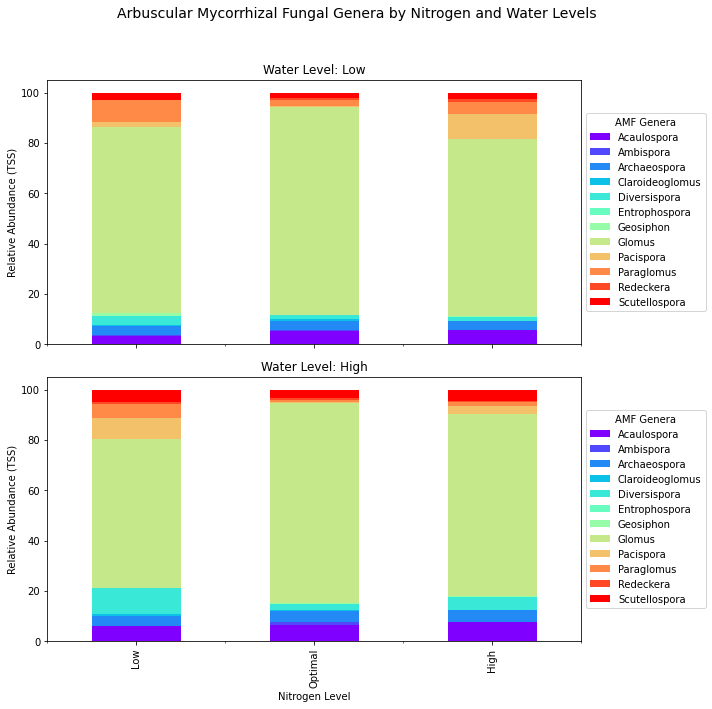

In [5]:
# Regroup the data by the updated "Nitrogen" and "Water" levels and sum the values of each AMF genus
grouped_df = df.groupby(['Nitrogen', 'Water'])[amf_genera_cols].mean().reset_index()

# Sort the grouped DataFrame by 'Nitrogen' according to the predefined order
nitrogen_order = ['Low', 'Optimal', 'High']
grouped_df['Nitrogen'] = pd.Categorical(grouped_df['Nitrogen'], categories=nitrogen_order, ordered=True)
grouped_df = grouped_df.sort_values('Nitrogen')

# Create two subplots for "Low" and "High" water levels
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True, sharey = True)
fig.suptitle('Arbuscular Mycorrhizal Fungal Genera by Nitrogen and Water Levels', fontsize=14)

# Define color map for the rainbow colors
cmap = plt.cm.get_cmap('rainbow', len(amf_genera_cols))

# Plot the stacked bar plots for "Low" and "High" water levels
for i, water_level in enumerate(['Low', 'High']):
    # Filter data for the current water level
    water_level_df = grouped_df[grouped_df['Water'] == water_level]
    
    # Plot stacked bar plot
    water_level_df.plot(kind='bar', x='Nitrogen', y=amf_genera_cols, stacked=True, ax=axes[i], colormap=cmap)
    
    # Set subplot title, labels, and legend
    axes[i].set_title(f'Water Level: {water_level}', fontsize=12)
    axes[i].set_ylabel('Relative Abundance (TSS)')
    axes[i].legend(loc='center left', bbox_to_anchor=(1, 0.5), title='AMF Genera')

# Set x-axis label for the whole figure
plt.xlabel('Nitrogen Level')

# Adjust subplot layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the figure
plt.savefig('../../Fungal manuscript/Figures/Figure 2.jpg', bbox_inches='tight', dpi=300)

In [6]:
# Assuming the 'Glomus' column contains the abundance of the genus 'Glomus'
glomus_abundance = grouped_df['Glomus'].sum()

# Sum the abundance of all the genera in amf_genera_cols
total_abundance = grouped_df.drop(['Water','Nitrogen'], axis = 1).sum().sum()

# Calculate the percentage of abundance from the genus 'Glomus'
glomus_percentage = (glomus_abundance / total_abundance) * 100

print(f"The abundance of the genus 'Glomus' is {glomus_percentage:.2f}% of the total abundance.")

The abundance of the genus 'Glomus' is 73.00% of the total abundance.


In [7]:
total_abundance

600.0000000000001

In [8]:
# Sample depth
samples_df = df[['Acaulospora', 'Ambispora', 'Archaeospora', 'Claroideoglomus',
       'Diversispora', 'Entrophospora', 'Geosiphon', 'Glomus', 'Pacispora',
       'Paraglomus', 'Redeckera', 'Scutellospora']]
print(samples_df.sum(axis = 1).mean())
print(samples_df.sum(axis = 1).std())

99.4047619047619
7.715167498104596


In [10]:
# Calculate the number of samples for each combination of Nitrogen and Water levels
sample_counts = df.groupby(['Nitrogen', 'Water']).size().reset_index(name='Samples')
sample_counts

,Nitrogen,Water,Samples
0,High,High,30
1,High,Low,28
2,Low,High,26
3,Low,Low,27
4,Optimal,High,28
5,Optimal,Low,29


In [11]:
grouped_df

,Nitrogen,Water,Acaulospora,Ambispora,Archaeospora,Claroideoglomus,Diversispora,Entrophospora,Geosiphon,Glomus,Pacispora,Paraglomus,Redeckera,Scutellospora
2,Low,High,6.247439,0.011249,4.036847,0.410460,10.622902,0.004209,0.005111,59.097580,8.263918,5.610552,0.759638,4.930095
3,Low,Low,3.534442,0.057229,3.675521,0.263611,3.630006,0.000000,1.502428,73.809002,1.840548,8.701835,0.143226,2.842152
4,Optimal,High,6.610770,0.915182,4.610740,0.241474,2.395491,0.000000,0.314910,79.811570,0.099185,1.002690,0.700674,3.297315
5,Optimal,Low,5.242513,0.606136,3.578162,0.546196,1.676293,0.117295,0.000000,82.763918,0.188544,2.463602,0.706717,2.110625
0,High,High,7.662747,0.000000,4.970659,0.000000,4.981663,0.000000,0.557762,72.135955,3.169203,1.605497,0.629915,4.286600
1,High,Low,5.584424,0.000000,3.523545,0.000000,1.587764,0.000000,0.769949,70.360662,9.861221,4.836845,0.933711,2.541879
